<a href="https://colab.research.google.com/github/anwar-opu/cats_vs_dog_classification/blob/main/transfer_learning_feature_extraction(with_data_augmentation).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
# Download the dataset
!kaggle datasets download -d salader/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
dogs-vs-cats.zip: Skipping, found more recently modified local copy (use --force to force download)


In [26]:
import zipfile

# Unzip the downloaded file
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()


In [27]:
# List files in the dataset folder
!ls dogs-vs-cats

ls: cannot access 'dogs-vs-cats': No such file or directory


In [28]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Flatten
from keras.applications.vgg16 import VGG16


In [29]:
conv_base = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(150,150,3)
)

In [30]:
model = Sequential()

model.add(conv_base)
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [31]:
conv_base.trainable = False

In [32]:
from tensorflow.keras.utils import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [33]:
# data augmentation
batch_size = 32

train_datagen = ImageDataGenerator(
    rescale = 1./255,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True
)

test_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = train_datagen.flow_from_directory(
    '/content/train',
    target_size = (150, 150),
    batch_size = batch_size,
    class_mode = 'binary'
)

validation_generator = test_datagen.flow_from_directory(
    '/content/test',
    target_size = (150, 150),
    batch_size = batch_size,
    class_mode = 'binary'
)


Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.


In [34]:
model.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])

In [24]:
# Model fitting
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=validation_generator
)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


625/625 ━━━━━━━━━━━━━━━━━━━━ 173s 258ms/step - accuracy: 0.8424 - loss: 0.3672 - val_accuracy: 0.9092 - val_loss: 0.2175
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 181s 239ms/step - accuracy: 0.8976 - loss: 0.2384 - val_accuracy: 0.9062 - val_loss: 0.2110
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 152s 241ms/step - accuracy: 0.9096 - loss: 0.2153 - val_accuracy: 0.9100 - val_loss: 0.2152
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 149s 236ms/step - accuracy: 0.9107 - loss: 0.2095 - val_accuracy: 0.8988 - val_loss: 0.2343
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 151s 240ms/step - accuracy: 0.9195 - loss: 0.1941 - val_accuracy: 0.9056 - val_loss: 0.2129
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 160s 254ms/step - accuracy: 0.9159 - loss: 0.1963 - val_accuracy: 0.9170 - val_loss: 0.1982
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 193s 240ms/step - accuracy: 0.9231 - loss: 0.1764 - val_accuracy: 0.9178 - val_loss: 0.1931
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 150s 238ms/step - accuracy: 0.9277 - loss: 0.16

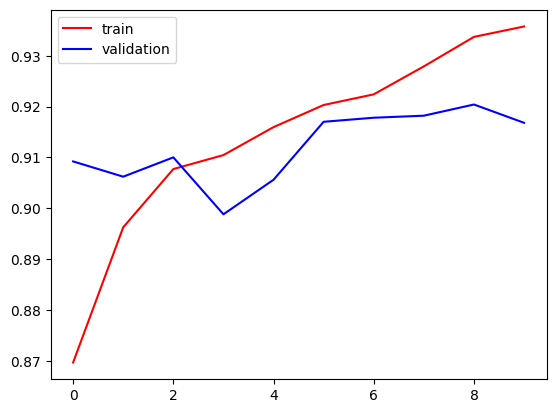

In [35]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

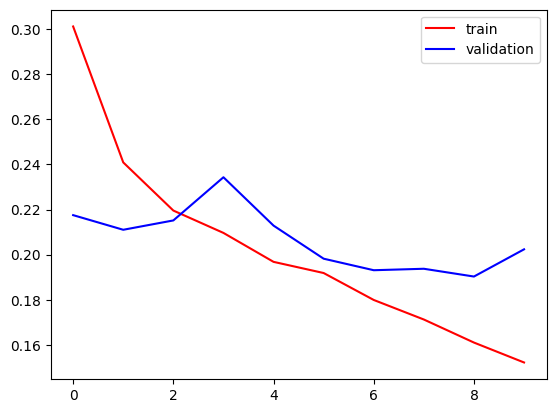

In [36]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()